# Project Milestone 1

## Introduction

Fact-checking has rapidly grown as a staple in journalistic enterprise. Politicians will say one thing and in an hour there will be dozens of fact-check articles rating whether or not said statement was the truth or not. Such journalism raises several questions for the curious mind (or the thoughtful media team).  Chief among them, and the question that I will be investigating, is whether there is a linguistic pattern of facts? That is, are there certain words or phrases that can be used to predict the veracity of a given statement? If the answer to this question is yes, then that suggets that media teams, politicians, and any other person concerned with the domain of fact-telling could try and tailor their utterances so that they can better frame what they say as the truth. Conversely, it also suggests that fact-checking journalists may not be as nearly as objective as they claim to be and that they rely on associations with certain words to make their judgment. 


In order to answer this question, I will be building a sentimenet analysis model that will predict whether or not a statement is true or false. I will be using a [dataset of over 20,000 *PolitiFact* fact checks](https://www.kaggle.com/datasets/rmisra/politifact-fact-check-dataset) in my analysis. It contains information such as the statement being judged, its source, and the verdict (true, false, etc). I will train the model on this data and test whether or not it can accurately predict what the factchecker rating. While the main focus of my project is on the words/phrases used in these statements, I will also be analyzing the source of the statement to see if there is some predictive power there.

## Graphical Analysis

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np

In [4]:
# load dataset
factcheck = pd.read_json("politifact_factcheck_data.json", lines=True)
factcheck

,verdict,statement_originator,statement,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link
0,true,Barack Obama,John McCain opposed bankruptcy protections for...,6/11/2008,speech,Adriel Bettelheim,6/16/2008,https://www.politifact.com/factchecks/2008/jun...
1,false,Matt Gaetz,"""Bennie Thompson actively cheer-led riots in t...",6/7/2022,television,Yacob Reyes,6/13/2022,https://www.politifact.com/factchecks/2022/jun...
2,mostly-true,Kelly Ayotte,"Says Maggie Hassan was ""out of state on 30 day...",5/18/2016,news,Clay Wirestone,5/27/2016,https://www.politifact.com/factchecks/2016/may...
3,false,Bloggers,"""BUSTED: CDC Inflated COVID Numbers, Accused o...",2/1/2021,blog,Madison Czopek,2/5/2021,https://www.politifact.com/factchecks/2021/feb...
4,half-true,Bobby Jindal,"""I'm the only (Republican) candidate that has ...",8/30/2015,television,Linda Qiu,8/30/2015,https://www.politifact.com/factchecks/2015/aug...
...,...,...,...,...,...,...,...,...
21147,mostly-false,Donald Trump,Says the large trade deficit with Japan stems ...,8/13/2019,speech,Jon Greenberg,8/15/2019,https://www.politifact.com/factchecks/2019/aug...
21148,false,Donald Trump Jr.,"""Tens of thousands"" of people leave New York e...",11/1/2019,social_media,Jill Terreri Ramos,11/8/2019,https://www.politifact.com/factchecks/2019/nov...
21149,mostly-false,Chris Abele,"""I have fought for our shared values without b...",1/4/2011,news,Dave Umhoefer,1/13/2011,https://www.politifact.com/factchecks/2011/jan...
21150,false,Bloggers,"""Germany halts all Covid-19 vaccines, says the...",8/27/2021,blog,Ciara O'Rourke,9/9/2021,https://www.politifact.com/factchecks/2021/sep...


### Frequency of Verdicts

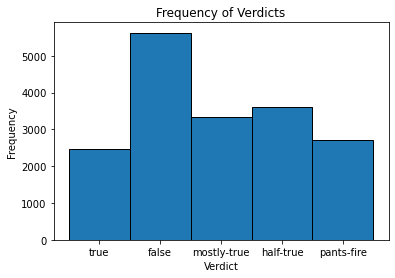

In [54]:
plt.hist(factcheck.verdict, bins=np.arange(6)-.5, ec="black")
plt.xlabel("Verdict"), plt.ylabel("Frequency")
plt.title("Frequency of Verdicts")
plt.show()

The above graph details the frequency of each verdict within the dataset. It shows that the most frequent verdict by far is false, with half-true and mostly-true in second and third respectively. What this tells us is that the dataset does not have an uniform distribution of verdicts. When building the model, I will need to take this into account by giving appropriate weight to each of the verdicts.

### Frequency of Statement Source

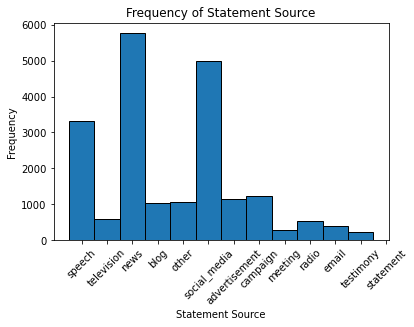

In [53]:
plt.hist(factcheck.statement_source, np.arange(13)-.5, ec="black")
plt.xticks(rotation=45)
plt.xlabel("Statement Source"), plt.ylabel("Frequency")
plt.title("Frequency of Statement Source")
plt.show()

This graph illustrates the frequency of sources from which the statements are pulled in the dataset. Speech, news, and social media are by far the most scrutinized. Already, we can start to take guesses as to why it is that these are most scrutinized; they are also the most visible form. Again, this does mean that when building a model we must take this unequal weight into account.

### Pie Chart of Verdicts

In [74]:
def label_function(val):
    return f'{val / 100 * len(factcheck):.0f}\n{val:.0f}%'

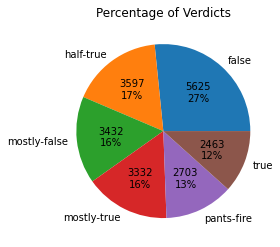

In [80]:
factcheck.groupby("verdict").size().plot(kind="pie", autopct=label_function)
plt.title("Percentage of Verdicts")
plt.ylabel("")
plt.show()

I decided to make a piechart to look more closely at the breakdown of the verdicts. It shows the same information as the previous histogram, however this one clearly labels the percentage share as well as amount of verdicts within each category. Using these percentages we will be able to more accurately create the weights needed to properly train our model

### WordCloud of Statements

In [20]:
stopwords = set(STOPWORDS)
comment_words = ""

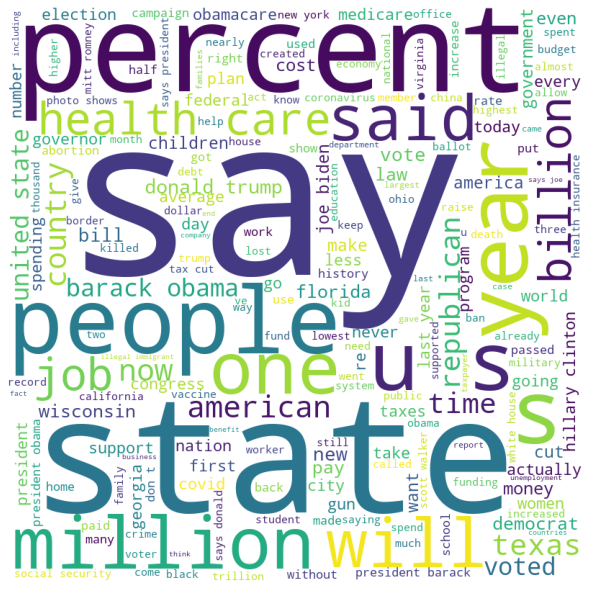

In [21]:
# create word cloud
for val in factcheck.statement:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

This wordcloud is a visual representation of the words most frequently used in the factcheck statement. It shows "Say", "Percent", "People", and "State" as the words most frequently used. While this does not tell use definitively that these words will be able to predict the verdict of the factcheck, it does give us a sense of the type of words that *may* have an influence. In the next steps of building the model, I should pay attention to those words and see how they begin to influence each verdict.  

### Summary of Findings

The graphs have each shown us a particular aspect of the data. The most important information gleaned from these graphs is that the data is not uniformly distributed and that we must take that into account when trying to build an accurate and precise model. In addition, given that we are working with ordinal categorical variables, we must also decide on how to properly quantify these rankings. 

With the wordcloud we got a glimpse into what a model may reveal to us. While we don't know which way these words predict the verdict to go, we get an idea of what kind of words to look for. 

More work needs to be done in formatting the data correctly, specifically when it comes to comparing the statement source and the verdict, since they are both categorical and are not immediately comparable.